<a href="https://colab.research.google.com/github/anisha3111/LGM-DataScience-Task2.github.io/blob/main/Exploratory_Data_Analysis_on_Dataset_Terrorism_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
terror_df = pd.read_csv("/content/drive/MyDrive/globalterrorismdb_0718dist.csv", encoding ='latin1')
terror_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
terror_df.columns.to_list()

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [ ]:
terror_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day', 'country_txt':'Country','provstate':'state',
                         'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
terror_df.columns

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
#now we donot need all 135 columns, we'll just select the important ones
terror_df = terror_df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
                      'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror_df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [ ]:
terror_df.shape

(34475, 18)

In [ ]:
#check for missing values
terror_df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
state            131
Region             0
city               0
latitude        1883
longitude       1883
AttackType         0
Killed          5626
Wounded         7434
Target           372
Summary        33346
Group              0
Target_type        0
Weapon_type        1
Motive         33617
dtype: int64

In [ ]:
terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34475 entries, 0 to 34474
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         34475 non-null  int64  
 1   Month        34475 non-null  int64  
 2   Day          34475 non-null  int64  
 3   Country      34475 non-null  object 
 4   state        34344 non-null  object 
 5   Region       34475 non-null  object 
 6   city         34475 non-null  object 
 7   latitude     32592 non-null  float64
 8   longitude    32592 non-null  float64
 9   AttackType   34475 non-null  object 
 10  Killed       28849 non-null  float64
 11  Wounded      27041 non-null  float64
 12  Target       34103 non-null  object 
 13  Summary      1129 non-null   object 
 14  Group        34475 non-null  object 
 15  Target_type  34475 non-null  object 
 16  Weapon_type  34474 non-null  object 
 17  Motive       858 non-null    object 
dtypes: float64(4), int64(3), object(11)
memory usa

In [ ]:
terror_df.describe(include='all')

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
count,34475.000000,34475.000000,34475.000000,34475,34344,34475,34475,32592.000000,3.259200e+04,34475,28849.000000,27041.000000,34103,1129,34475,34475,34474,858
unique,NaN,NaN,NaN,140,953,11,6343,NaN,NaN,9,NaN,NaN,21200,1094,1312,22,12,395
top,NaN,NaN,NaN,El Salvador,Northern Ireland,South America,Unknown,NaN,NaN,Bombing/Explosion,NaN,NaN,Military Unit,09/28/1972: A letter bomb addressed to a local...,Unknown,Business,Explosives,Unknown
freq,NaN,NaN,NaN,3980,2394,8698,2169,NaN,NaN,15606,NaN,NaN,1399,6,10453,6346,15506,90
mean,1981.644525,6.233648,15.228978,NaN,NaN,NaN,NaN,18.521995,-2.675146e+03,NaN,2.185726,1.723124,NaN,NaN,NaN,NaN,NaN,NaN
std,4.386154,3.394320,8.849860,NaN,NaN,NaN,NaN,25.504563,4.773979e+05,NaN,9.351165,11.265305,NaN,NaN,NaN,NaN,NaN,NaN
min,1970.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,-53.154613,-8.618590e+07,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1979.000000,3.000000,8.000000,NaN,NaN,NaN,NaN,5.252105,-7.851209e+01,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1982.000000,6.000000,15.000000,NaN,NaN,NaN,NaN,14.622869,-6.606113e+01,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1985.000000,9.000000,23.000000,NaN,NaN,NaN,NaN,40.917977,1.050799e+01,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


## **Exploratory Data Analysis**

In [ ]:
print('Country with most attacks: ',terror_df['Country'].value_counts().idxmax())
print('City with most attacks: ',terror_df['city'].value_counts().index[1])
print("Region with the most attacks:",terror_df['Region'].value_counts().idxmax())
print("Year with the most attacks:",terror_df['Year'].value_counts().idxmax())
print("Month with the most attacks:",terror_df['Month'].value_counts().idxmax())
print("Group with the most attacks:",terror_df['Group'].value_counts().index[1])
print("Most Attack Types:",terror_df['AttackType'].value_counts().idxmax())

Country with most attacks:  El Salvador
City with most attacks:  Lima
Region with the most attacks: South America
Year with the most attacks: 1984
Month with the most attacks: 5
Group with the most attacks: Shining Path (SL)
Most Attack Types: Bombing/Explosion


In [ ]:
terror_df['Year'].value_counts(dropna=False).sort_index()

1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
1978    1526
1979    2662
1980    2662
1981    2586
1982    2544
1983    2870
1984    3495
1985    2915
1986    2860
1987    3183
1988    1446
Name: Year, dtype: int64

# **Visualization**

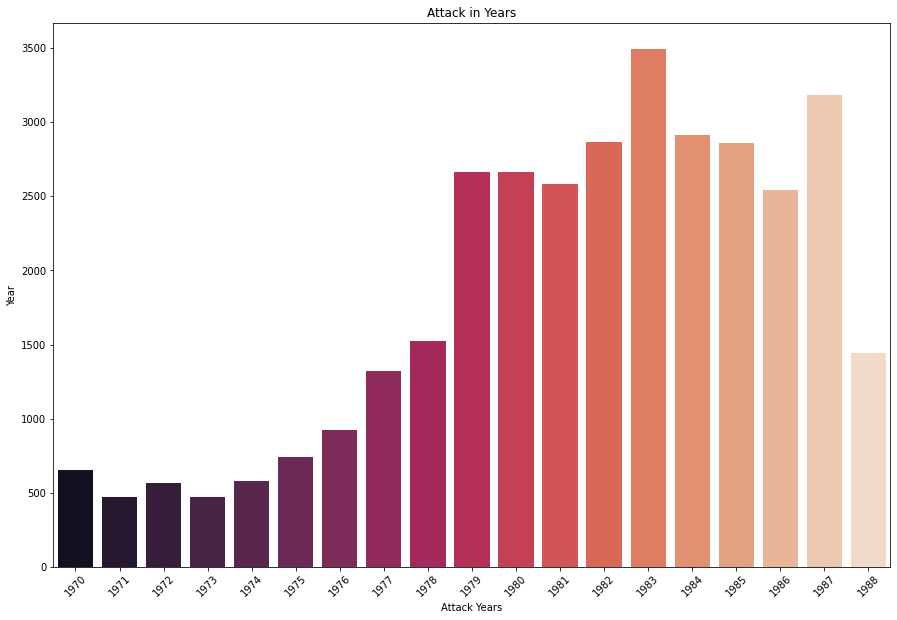

In [ ]:
#Barplot
import seaborn as sns

x_year = terror_df['Year'].unique()
y_year = terror_df['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(15,10))
plt.title("Attack in Years")
plt.xlabel("Attack Years")
plt.ylabel("Number of attacks each year")
plt.xticks(rotation=45)
sns.barplot(x=x_year, y=y_year, palette= 'rocket')
plt.show()

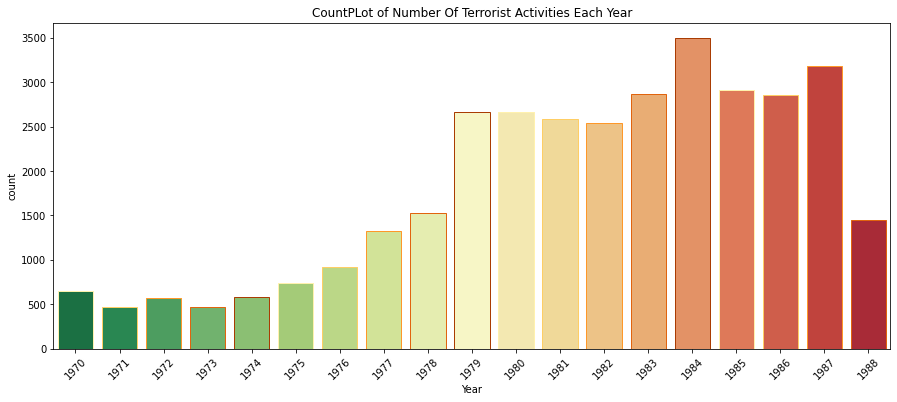

In [ ]:
#Countplot
plt.subplots(figsize=(15,6))
sns.countplot('Year', data=terror_df, palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 5))
plt.xticks(rotation=45)
plt.title('CountPLot of Number Of Terrorist Activities Each Year')
plt.show()

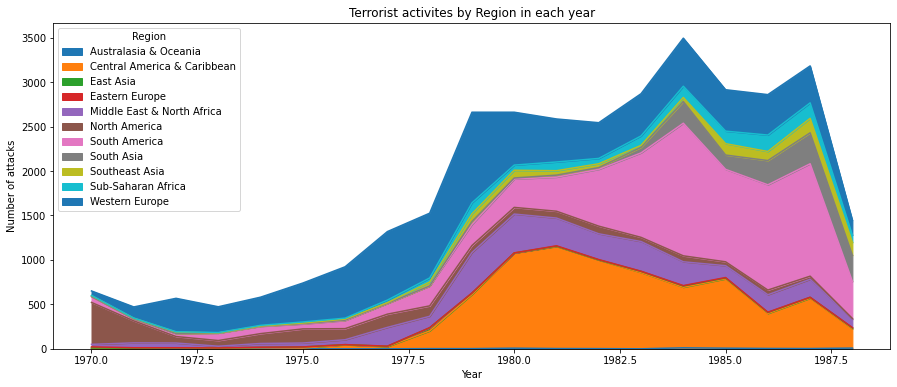

In [ ]:
#Area plot
pd.crosstab(terror_df.Year,terror_df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist activites by Region in each year')
plt.ylabel("Number of attacks")
plt.show()

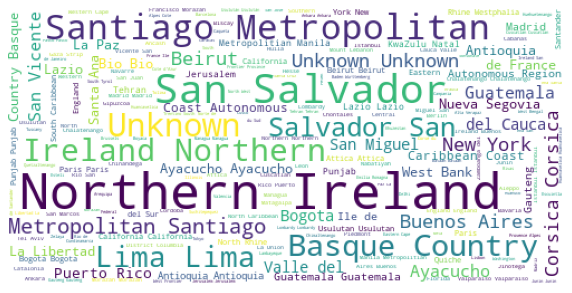

In [ ]:
from wordcloud import WordCloud
from scipy import signal
cities=terror_df.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud= WordCloud(background_color='white', width=500, height = 250).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
terror_df['Wounded'] = terror_df['Wounded'].fillna(0).astype(int)
terror_df['Killed'] = terror_df['Killed'].fillna(0).astype(int)
terror_df['casualities'] = terror_df['Killed'] + terror_df['Wounded']

In [ ]:
#Taking only 30 countries for visualization of heatmap properly
terror_copy = terror_df.sort_values(by='casualities',ascending=False)[:30]

In [ ]:
terror_copy.corr()

,Year,Month,Day,latitude,longitude,Killed,Wounded,casualities
Year,1.000000,-0.356569,0.143817,-0.436941,0.146640,0.162834,-0.073072,0.051397
Month,-0.356569,1.000000,-0.052705,0.289365,-0.177585,-0.121057,0.378989,0.418071
Day,0.143817,-0.052705,1.000000,-0.119457,-0.168361,0.193176,-0.180295,-0.070580
latitude,-0.436941,0.289365,-0.119457,1.000000,-0.216405,-0.385155,0.371046,0.154705
longitude,0.146640,-0.177585,-0.168361,-0.216405,1.000000,-0.157644,-0.034183,-0.194482
Killed,0.162834,-0.121057,0.193176,-0.385155,-0.157644,1.000000,-0.703279,-0.042068
Wounded,-0.073072,0.378989,-0.180295,0.371046,-0.034183,-0.703279,1.000000,0.739870
casualities,0.051397,0.418071,-0.070580,0.154705,-0.194482,-0.042068,0.739870,1.000000


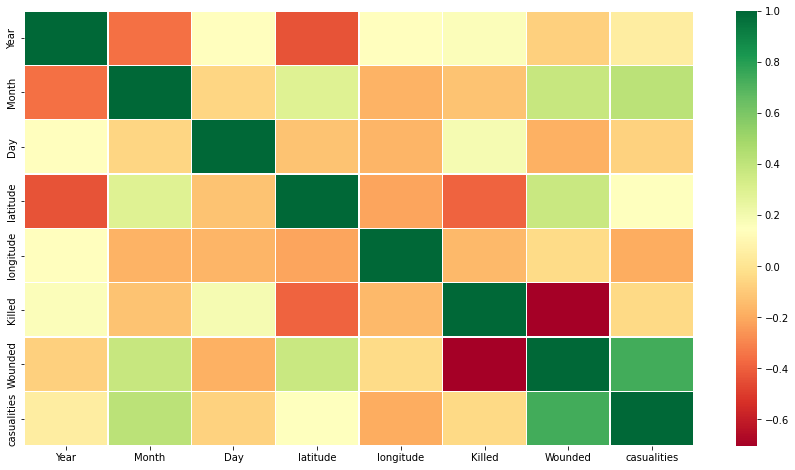

In [ ]:
#Generating heatmap for correlation ploy
plt.figure(figsize=[15,8])
sns.heatmap(terror_copy.corr(),cmap='RdYlGn', linewidths=0.4)
plt.show()

In [ ]:
attack_country = terror_df.Country.value_counts()[:15]
attack_country

El Salvador       3980
Peru              3381
United Kingdom    2656
Colombia          2646
Spain             1997
United States     1932
Nicaragua         1732
Chile             1550
Guatemala         1510
France            1294
Italy             1286
Lebanon           1132
Philippines        801
India              733
South Africa       695
Name: Country, dtype: int64

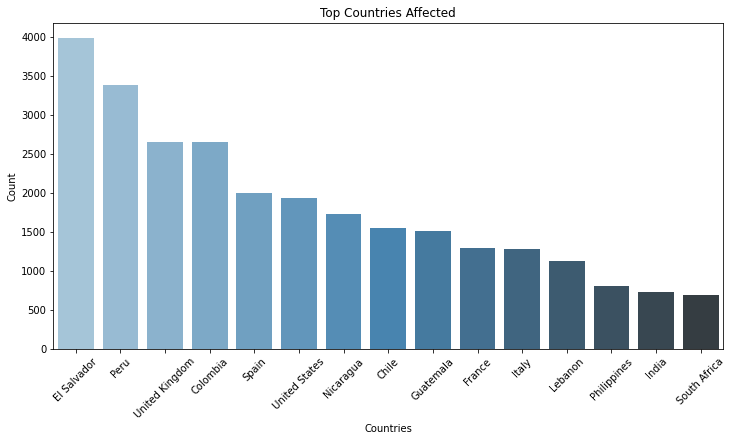

In [ ]:
## Countries affected by terrorism
plt.subplots(figsize=(12,6))
sns.barplot(attack_country.index,attack_country.values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

In [ ]:
attack_groups = terror_df.Group.value_counts()[1:15]
attack_groups

Shining Path (SL)                                   2553
Farabundo Marti National Liberation Front (FMLN)    2115
Irish Republican Army (IRA)                         1737
Basque Fatherland and Freedom (ETA)                 1215
Nicaraguan Democratic Force (FDN)                    895
Revolutionary Armed Forces of Colombia (FARC)        557
Manuel Rodriguez Patriotic Front (FPMR)              556
M-19 (Movement of April 19)                          538
Palestinians                                         494
African National Congress (South Africa)             458
New People's Army (NPA)                              438
National Liberation Army of Colombia (ELN)           409
Corsican National Liberation Front (FLNC)            327
Tupac Amaru Revolutionary Movement (MRTA)            311
Name: Group, dtype: int64

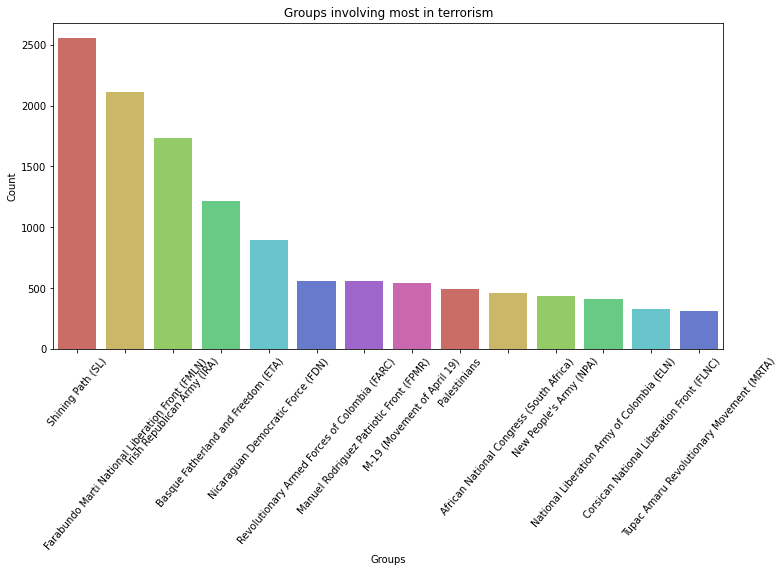

In [ ]:
## Groups involving most in terrorism
plt.subplots(figsize=(12,6))
sns.barplot(attack_groups.index,attack_groups.values,palette=sns.color_palette("hls", 8))
plt.title('Groups involving most in terrorism')
plt.xlabel('Groups')
plt.ylabel('Count')
plt.xticks(rotation= 50)
plt.show()

In [ ]:
#Terrorist group names and killed each year
group_killed= terror_df[['Group','Killed']].groupby(['Group'],axis=0).sum().sort_values('Killed', ascending=False).head(15)
group_killed

,Killed
Group,
Unknown,12811
Farabundo Marti National Liberation Front (FMLN),6808
Nicaraguan Democratic Force (FDN),6662
Shining Path (SL),6580
Democratic Revolutionary Alliance (ARDE),1803
Revolutionary Armed Forces of Colombia (FARC),1609
New People's Army (NPA),1506
Irish Republican Army (IRA),1495
Liberation Tigers of Tamil Eelam (LTTE),1403


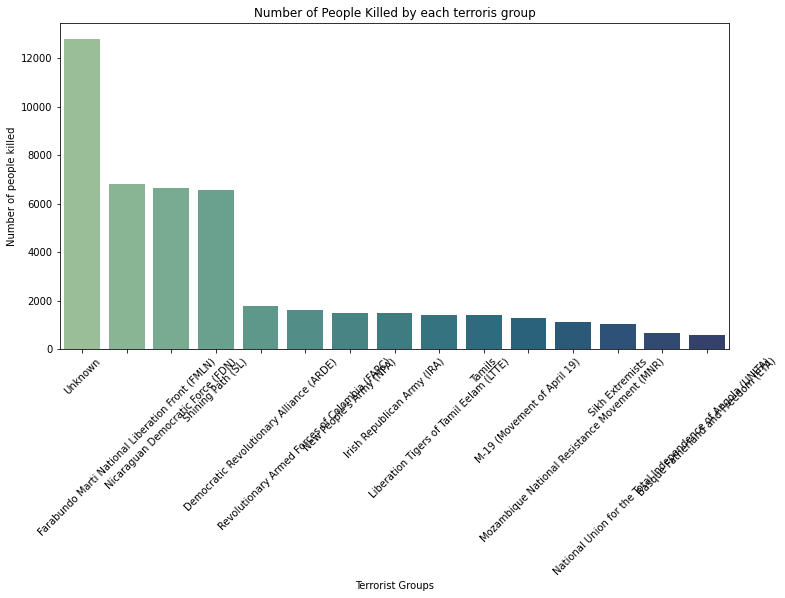

In [ ]:
## People Killed by each group in terrorist activity
plt.subplots(figsize=(12,6))
sns.barplot(group_killed.index, group_killed.Killed.values,palette="crest")
plt.title('Number of People Killed by each terroris group')
plt.xlabel('Terrorist Groups')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 45)
plt.show()

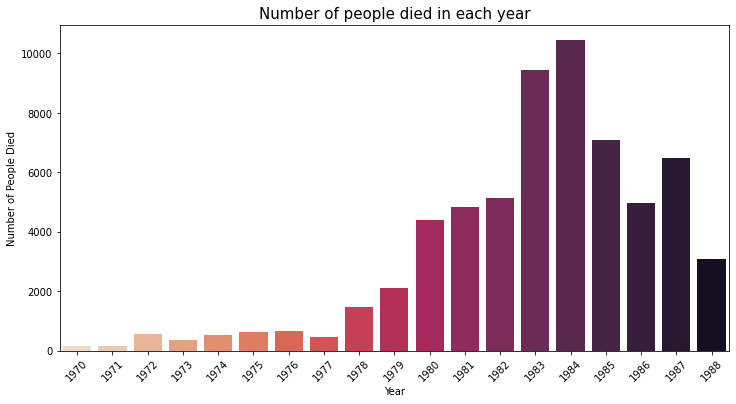

In [ ]:
died_people = terror_df[['Year','Killed']].groupby(['Year']).sum()
plt.subplots(figsize=(12,6))
sns.barplot(died_people.index, died_people.Killed.values,palette="rocket_r")
plt.title("Number of people died in each year",fontsize=15)
plt.ylabel("Number of People Died")
plt.xlabel('Year')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
attack_cities = terror_df.city.value_counts()[:15]
attack_cities

Unknown           2169
Lima              1239
Belfast           1184
San Salvador      1174
Santiago          1040
Beirut             642
Guatemala City     510
Paris              498
Bogota             495
Rome               489
New York City      400
Buenos Aires       331
Athens             315
Madrid             304
Ayacucho           294
Name: city, dtype: int64

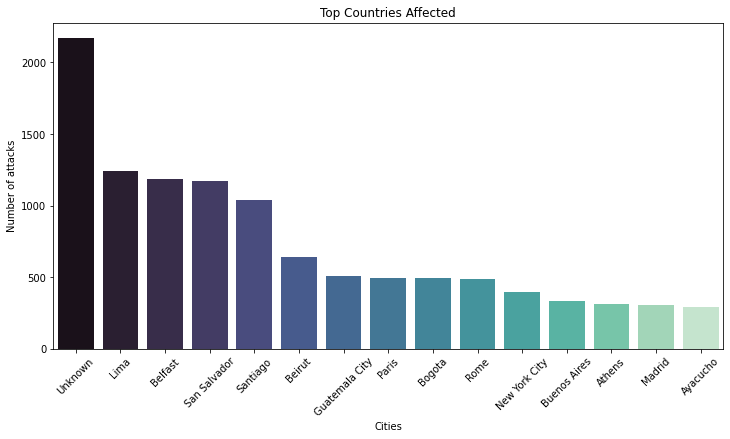

In [ ]:
## Top Countries affected
plt.subplots(figsize=(12,6))
sns.barplot(attack_cities.index,attack_cities.values,palette="mako")
plt.title('Top Countries Affected')
plt.xlabel('Cities')
plt.ylabel('Number of attacks')
plt.xticks(rotation= 45)
plt.show()

In [ ]:
attack_type = terror_df.AttackType.value_counts()[:15]
attack_type

Bombing/Explosion                      15606
Armed Assault                           7450
Assassination                           5699
Facility/Infrastructure Attack          2311
Hostage Taking (Kidnapping)             1486
Unknown                                 1237
Hostage Taking (Barricade Incident)      474
Hijacking                                155
Unarmed Assault                           57
Name: AttackType, dtype: int64

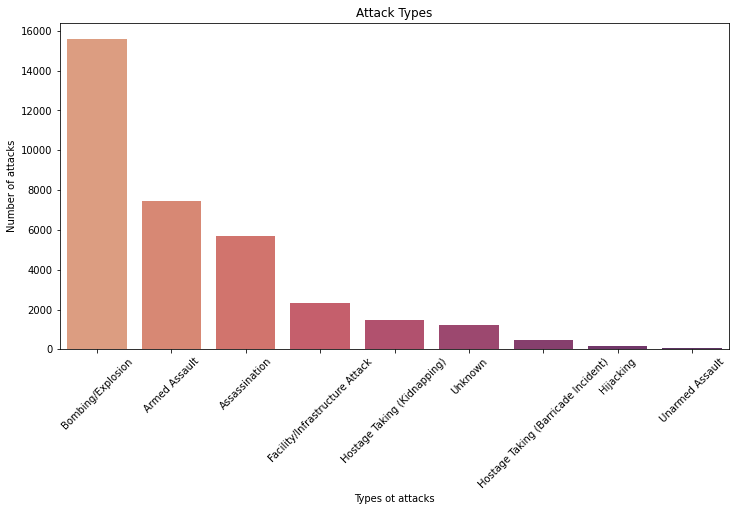

In [ ]:
## Attack types 
plt.subplots(figsize=(12,6))
sns.barplot(attack_type.index,attack_type.values,palette="flare")
plt.title('Attack Types')
plt.xlabel('Types ot attacks')
plt.ylabel('Number of attacks')
plt.xticks(rotation= 45)
plt.show()

In [ ]:
attack_killed = terror_df[['AttackType','Killed']].groupby(["AttackType"],axis=0).sum()
attack_killed

,Killed
AttackType,
Armed Assault,35265
Assassination,6935
Bombing/Explosion,13633
Facility/Infrastructure Attack,1118
Hijacking,405
Hostage Taking (Barricade Incident),474
Hostage Taking (Kidnapping),741
Unarmed Assault,49
Unknown,4436


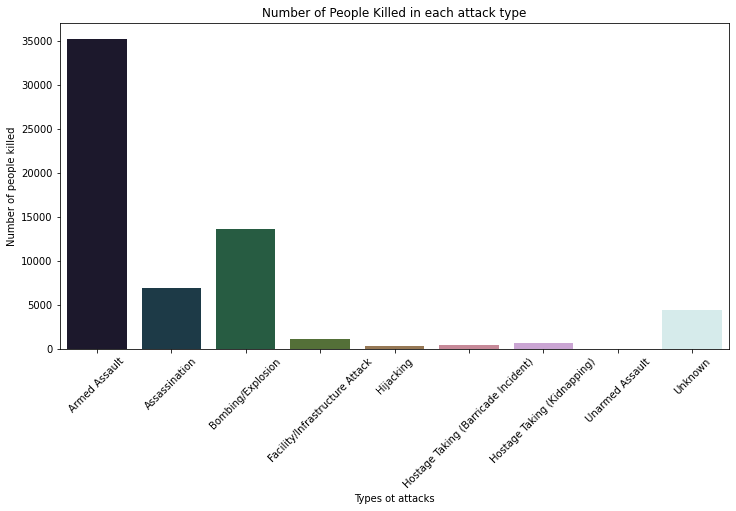

In [ ]:
## People Killed in each attack type
plt.subplots(figsize=(12,6))
sns.barplot(attack_killed.index, attack_killed.Killed.values,palette="cubehelix")
plt.title('Number of People Killed in each attack type')
plt.xlabel('Types ot attacks')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 45)
plt.show()

In [ ]:
attack_wounded = terror_df[['AttackType','Wounded']].groupby(["AttackType"],axis=0).sum()
attack_wounded

,Wounded
AttackType,
Armed Assault,7964
Assassination,1815
Bombing/Explosion,32929
Facility/Infrastructure Attack,599
Hijacking,297
Hostage Taking (Barricade Incident),542
Hostage Taking (Kidnapping),155
Unarmed Assault,971
Unknown,1323


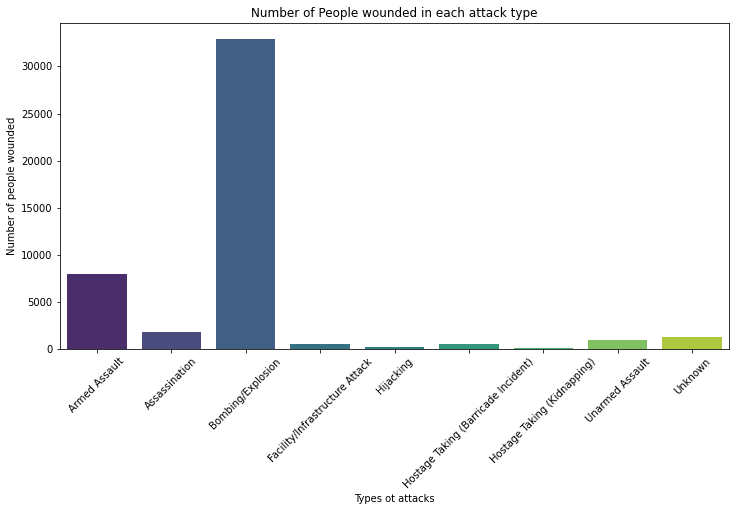

In [ ]:
## People Wounded in each attack type
plt.subplots(figsize=(12,6))
sns.barplot(attack_wounded.index, attack_wounded.Wounded.values,palette="viridis")
plt.title('Number of People wounded in each attack type')
plt.xlabel('Types ot attacks')
plt.ylabel('Number of people wounded')
plt.xticks(rotation= 45)
plt.show()